In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### Download the data

!wget https://github.com/gastonstat/CreditScoring/raw/master/CreditScoring.csv

### Data Preparation

In [2]:
df = pd.read_csv('CreditScoring.csv')

In [3]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


##### Convert all the column names to small letters

In [4]:
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


Categorical variables are represented by numbers. For converting, we'll use the following map (extracted from [Part1_CredScoring_Processing.R](https://github.com/gastonstat/CreditScoring/blob/master/Part1_CredScoring_Processing.R)). It's code in R which we'll translate to Pandas.

```
levels(dd$Status) = c("good", "bad")
levels(dd$Home) = c("rent", "owner", "priv", "ignore", "parents", "other")
levels(dd$Marital) = c("single", "married", "widow", "separated", "divorced")
levels(dd$Records) = c("no_rec", "yes_rec")
levels(dd$Job) = c("fixed", "partime", "freelance", "others")
```
Let's convert it:

In [5]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}
df.status = df.status.map(status_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [6]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}
df.home = df.home.map(home_values)

In [7]:
marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

In [8]:
records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

In [9]:
job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [10]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [11]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


We see there are huge max values in income, assets and debt so lets split that

In [12]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [13]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [14]:
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

Lets look at the target variable - status

In [15]:
df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

There's one record for which the status is unknown. Let's remove it - it's not useful for us

In [16]:
df = df[df.status != 'unk']

In [17]:
df.isnull().sum()

status        0
seniority     0
home          0
time          0
age           0
marital       0
records       0
job           0
expenses      0
income       34
assets       47
debt         18
amount        0
price         0
dtype: int64

Now we're ready to prepare the data for training:

- First, do train-validation-test split
- Then, apply one-hot encoding to categorical features and get the feature matrix

#### Train test split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=11)

In [20]:
df_train.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
4306,default,1,rent,36,24,married,no,partime,41,56.0,0.0,0.0,500,585
1119,ok,1,owner,60,24,single,no,fixed,35,70.0,4000.0,0.0,1200,1505
1305,default,5,parents,36,45,married,yes,fixed,75,68.0,0.0,0.0,2375,2875
2060,ok,13,owner,60,27,married,no,fixed,60,112.0,3000.0,1485.0,800,1200
1393,ok,9,other,36,32,single,no,fixed,35,125.0,0.0,0.0,1000,1725


In [21]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [22]:
y_train = (df_train.status == 'default').astype('int')
y_val = (df_val.status == 'default').astype('int')
y_test = (df_test.status == 'default').astype('int')

In [23]:
del df_train['status']
del df_val['status']
del df_test['status']

In [24]:
df_train.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,3340.000000,3340.000000,3340.000000,3340.000000,3311.000000,3303.000000,3327.000000,3340.000000,3340.00000
mean,7.964970,46.456886,36.870060,55.335329,130.968590,5444.610960,341.818756,1031.859880,1453.34491
std,8.178323,14.749691,10.866359,19.543276,84.990685,11131.350487,1284.600723,459.861898,599.79421
min,0.000000,6.000000,18.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.00000
25%,2.000000,36.000000,28.000000,35.000000,81.000000,0.000000,0.000000,700.000000,1111.75000
50%,5.000000,48.000000,35.000000,49.000000,120.000000,3436.000000,0.000000,1000.000000,1400.00000
75%,12.000000,60.000000,45.000000,70.000000,165.000000,6000.000000,0.000000,1300.000000,1686.00000
max,47.000000,72.000000,68.000000,180.000000,905.000000,300000.000000,30000.000000,4000.000000,8800.00000


### Decision Trees
- How a decision tree looks like
- Training a decision tree
- Overfitting
- Controlling the size of a tree

In [25]:
def assess_risk(client):
    if client['records']=='yes':
        if client['job']=='parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [26]:
xi = df_train.iloc[0].to_dict()

In [27]:
assess_risk(xi)

'default'

In [28]:
xi

{'seniority': 1,
 'home': 'rent',
 'time': 36,
 'age': 24,
 'marital': 'married',
 'records': 'no',
 'job': 'partime',
 'expenses': 41,
 'income': 56.0,
 'assets': 0.0,
 'debt': 0.0,
 'amount': 500,
 'price': 585}

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer # to do one hot encoding
from sklearn.metrics import roc_auc_score

In [30]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [31]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [32]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [33]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Lets test it

In [34]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [35]:
y_pred = dt.predict_proba(X_val)[:,1]

In [36]:
roc_auc_score(y_val, y_pred)

0.6728520190294359

In [37]:
xi

{'seniority': 1,
 'home': 'rent',
 'time': 36,
 'age': 24,
 'marital': 'married',
 'records': 'no',
 'job': 'partime',
 'expenses': 41,
 'income': 56.0,
 'assets': 0.0,
 'debt': 0.0,
 'amount': 500,
 'price': 585}

In [38]:
y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred)

1.0

If we let our tree grow too deep then it memorizes our data and that causes overfitting. Lets now give a restriction on the depth.

In [39]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [40]:
y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train, y_pred)
print("Train: ", auc)

y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
print("Val: ", auc)

Train:  0.7619636991251401
Val:  0.739853782905721


**Decision stump** is when we have a max_depth of only 1

Visualization of a Decision tree

In [41]:
from sklearn.tree import export_text

In [42]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 73.50
|   |   |   |--- class: 0
|   |   |--- income >  73.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 7250.00
|   |   |   |--- class: 1
|   |   |--- assets >  7250.00
|   |   |   |--- class: 0
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- seniority <= 1.50
|   |   |   |--- class: 1
|   |   |--- seniority >  1.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 109.50
|   |   |   |--- class: 1
|   |   |--- income >  109.50
|   |   |   |--- class: 0



### Decision tree learning algorithm
- Finding the best split for one column
- Finding the best split for the entire dataset
- Stopping criteria
- Decision tree learning algorithm

In [43]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

In [44]:
df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [45]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
4,5000,ok
3,5000,ok
0,8000,default
6,9000,ok


In [46]:
Ts = [2000, 3000, 4000, 5000, 8000]

In [47]:
from IPython.display import display

In [48]:
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]

    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))

2000


,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64
3000


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64
4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64
5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64
8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64


Lets create another column in our dataset

In [49]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000, 500, 'ok'],
    [3000, 2000, 'default'],
]

In [50]:
df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [51]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

In [52]:
for feature, Ts in thresholds.items():
    print('---------------------------')
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]
    
        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))
        print('---------------------------')    

---------------------------
0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64
---------------------------
2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64
---------------------------
3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64
---------------------------
4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64
---------------------------
5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64
---------------------------
8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64
---------------------------
---------------------------
500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64
---------------------------
1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64
---------------------------
2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64
---------------------------


### Decision trees parameter tuning
- selecting max_depth
- selecting min_samples_leaf

In [53]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)

    print('%4s -> %.3f' % (d, auc))

   1 -> 0.601
   2 -> 0.662
   3 -> 0.740
   4 -> 0.780
   5 -> 0.782
   6 -> 0.780
  10 -> 0.681
  15 -> 0.656
  20 -> 0.670
None -> 0.666


We get an idea that the best values are between 4, 5 and 6. For these values we now choose different values of min_samples_leaf

In [54]:
scores = []
for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500, 1000]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
    
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
    
        scores.append((d, s, auc))

Lets make it more readable 

In [55]:
columns= ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns= columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4,1,0.779995
1,4,2,0.780745
2,4,5,0.780788
3,4,10,0.778942
4,4,15,0.780627


In [56]:
df_scores.sort_values(by='auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
26,6,100,0.787720
14,5,15,0.784455
25,6,20,0.783876
12,5,5,0.783130
17,5,200,0.783112


In [57]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.780  0.782  0.778
2                 0.781  0.783  0.783
5                 0.781  0.783  0.783
10                0.779  0.783  0.779
15                0.781  0.784  0.778
20                0.776  0.781  0.784
100               0.770  0.779  0.788
200               0.770  0.783  0.783
500               0.729  0.729  0.729
1000              0.696  0.696  0.696

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

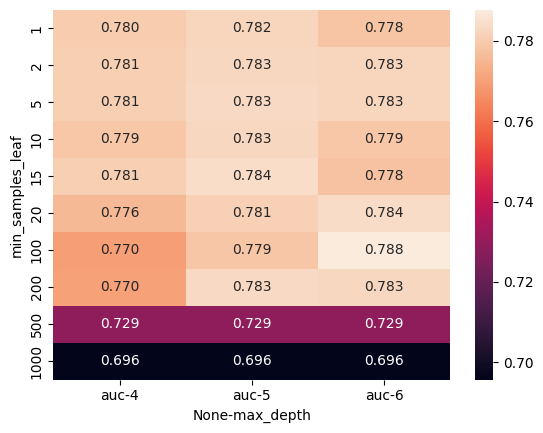

In [58]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

Lets choose a max_depth of 5 and min_samples_leaf of 10

#### Final Decision Tree Model

In [59]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Ensembles and random forest
- Board of experts
- Ensembling models
- Random forest - ensembling decision trees
- Tuning random forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [62]:
y_pred = rf.predict_proba(X_val)[:,1]

In [63]:
roc_auc_score(y_val, y_pred)

0.7889594701299926

In [64]:
rf.predict_proba(X_val[[0]])

array([[0.9, 0.1]])

Lets change the number of estimators

#### Paramter tunining in Random Forests

In [65]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

In [66]:
df_scores = pd.DataFrame(scores, columns = ['n_estimators', 'auc'])
df_scores

,n_estimators,auc
0,10,0.788959
1,20,0.813554
2,30,0.819154
3,40,0.824007
4,50,0.827431
5,60,0.826616
6,70,0.828527
7,80,0.826808
8,90,0.827030
9,100,0.827828


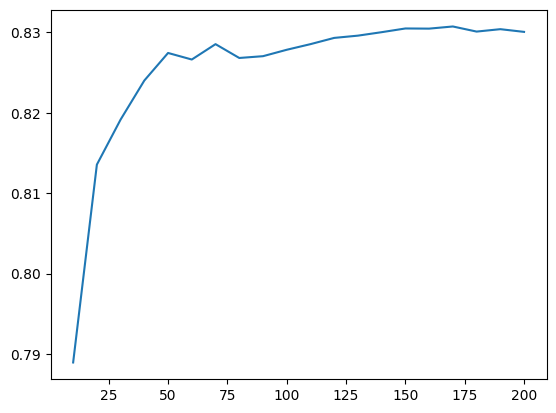

In [67]:
plt.plot(df_scores.n_estimators, df_scores.auc)

Experimenting with **max_depth** and **min_sample_leaf** parameters

In [68]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))

In [69]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns = columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.819097
1,5,20,0.822416
2,5,30,0.826779
3,5,40,0.824382
4,5,50,0.825887


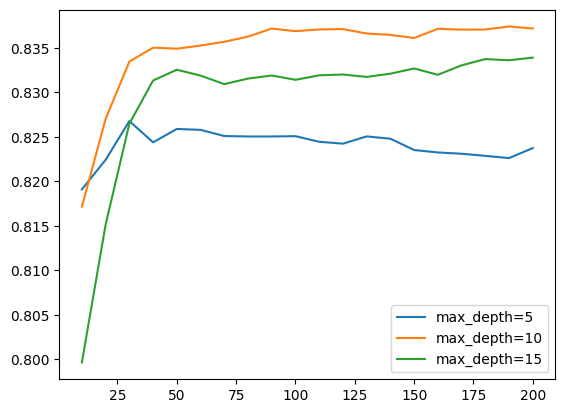

In [70]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label='max_depth=%d' %d)
    plt.legend()

The value of max_depth=10 seems best

In [71]:
scores = []

for l in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=10, min_samples_leaf=l, random_state=1)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((l, n, auc))

In [72]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns = columns)
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.817146
1,1,20,0.827022
2,1,30,0.833461
3,1,40,0.835032
4,1,50,0.834915


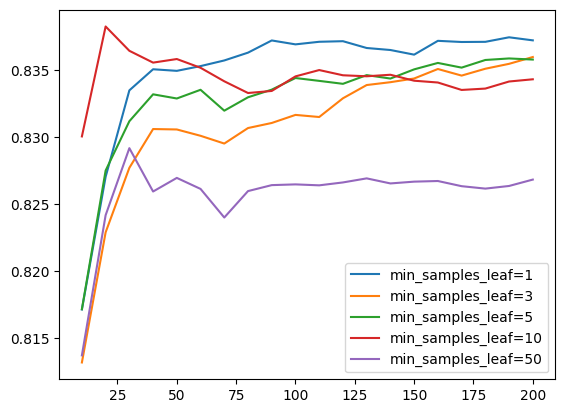

In [73]:
for l in [1, 3, 5, 10, 50]:
    df_subset = df_scores[df_scores.min_samples_leaf == l]
    plt.plot(df_subset.n_estimators, df_subset.auc, label='min_samples_leaf=%d' %l)
    plt.legend()

In [74]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]
list(zip(min_samples_leaf_values, colors))

[(1, 'black'), (3, 'blue'), (5, 'orange'), (10, 'red'), (50, 'grey')]

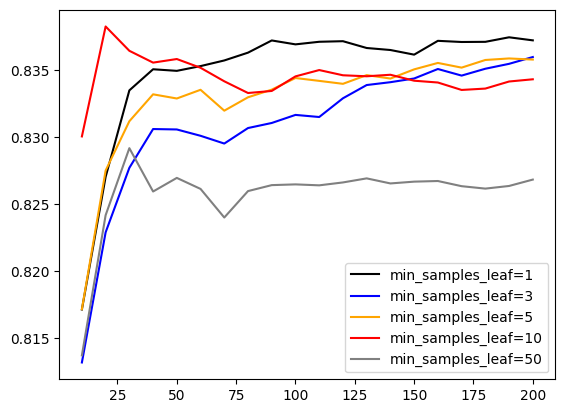

In [75]:
for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc, 
             color=col,
             label='min_samples_leaf=%d' %s)
plt.legend()

min_samples_leaf = 10 and n_estimators = 20

#### Final Random Forest Model

In [76]:
rf = RandomForestClassifier(n_estimators=20, max_depth=10, min_samples_leaf=10, random_state=1)
rf.fit(X_train, y_train)

,n_estimators,20
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 6.7 Gradient Boosting and XGBoost
- Gradient boosting vs random forest
- Installing XGBoost
- Training the first model
- Performance monitoring
- Parsing xgboost's monitoring output

!pip install xgboost

In [77]:
import xgboost as xgb

In [78]:
features = dv.get_feature_names_out()
features = [str(item) for item in features] 
features

['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

In [79]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [80]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'nthread': 4,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [81]:
y_pred = model.predict(dval)

In [82]:
roc_auc_score(y_val, y_pred)

0.8373187509084551

We can see how the tree is performing with each iteration through our dataset

In [83]:
watchlist = [(dtrain, 'train'), (dval, 'validation')]

In [84]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, 
                  evals=watchlist, 
                  verbose_eval=5,
                  num_boost_round=200)

[0]	train-auc:0.84883	validation-auc:0.79053
[5]	train-auc:0.91969	validation-auc:0.83302
[10]	train-auc:0.94203	validation-auc:0.83973
[15]	train-auc:0.95436	validation-auc:0.83855
[20]	train-auc:0.96917	validation-auc:0.83777
[25]	train-auc:0.97378	validation-auc:0.83607
[30]	train-auc:0.97931	validation-auc:0.83444
[35]	train-auc:0.98425	validation-auc:0.83227
[40]	train-auc:0.98762	validation-auc:0.83124
[45]	train-auc:0.99020	validation-auc:0.82925
[50]	train-auc:0.99283	validation-auc:0.82806
[55]	train-auc:0.99452	validation-auc:0.82757
[60]	train-auc:0.99603	validation-auc:0.82804
[65]	train-auc:0.99752	validation-auc:0.82627
[70]	train-auc:0.99807	validation-auc:0.82440
[75]	train-auc:0.99836	validation-auc:0.82285
[80]	train-auc:0.99884	validation-auc:0.82260
[85]	train-auc:0.99934	validation-auc:0.82091
[90]	train-auc:0.99956	validation-auc:0.81842
[95]	train-auc:0.99974	validation-auc:0.81827
[100]	train-auc:0.99987	validation-auc:0.81842
[105]	train-auc:0.99989	validation-

In [85]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, 
                  evals=watchlist, 
                  verbose_eval=5,
                  num_boost_round=200)

We can now parse this stdout and extract the data from it

In [86]:
print(output.stdout)

[0]	train-auc:0.84883	validation-auc:0.79053
[5]	train-auc:0.91969	validation-auc:0.83302
[10]	train-auc:0.94203	validation-auc:0.83973
[15]	train-auc:0.95436	validation-auc:0.83855
[20]	train-auc:0.96917	validation-auc:0.83777
[25]	train-auc:0.97378	validation-auc:0.83607
[30]	train-auc:0.97931	validation-auc:0.83444
[35]	train-auc:0.98425	validation-auc:0.83227
[40]	train-auc:0.98762	validation-auc:0.83124
[45]	train-auc:0.99020	validation-auc:0.82925
[50]	train-auc:0.99283	validation-auc:0.82806
[55]	train-auc:0.99452	validation-auc:0.82757
[60]	train-auc:0.99603	validation-auc:0.82804
[65]	train-auc:0.99752	validation-auc:0.82627
[70]	train-auc:0.99807	validation-auc:0.82440
[75]	train-auc:0.99836	validation-auc:0.82285
[80]	train-auc:0.99884	validation-auc:0.82260
[85]	train-auc:0.99934	validation-auc:0.82091
[90]	train-auc:0.99956	validation-auc:0.81842
[95]	train-auc:0.99974	validation-auc:0.81827
[100]	train-auc:0.99987	validation-auc:0.81842
[105]	train-auc:0.99989	validation-

In [87]:
s = output.stdout

In [88]:
line = s.split('\n')[0]

In [89]:
line

'[0]\ttrain-auc:0.84883\tvalidation-auc:0.79053'

In [90]:
line.split('\t')

['[0]', 'train-auc:0.84883', 'validation-auc:0.79053']

In [91]:
num_iter, train_auc, val_auc = line.split('\t')

In [92]:
int(num_iter.strip('[]'))

0

In [93]:
float(train_auc.split(':')[1])

0.84883

In [94]:
float(val_auc.split(':')[1])

0.79053

Lets write this in a function

In [95]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))

    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)

    return df_results

In [96]:
parse_xgb_output(output)

,num_iter,train_auc,val_auc
0,0,0.84883,0.79053
1,5,0.91969,0.83302
2,10,0.94203,0.83973
3,15,0.95436,0.83855
4,20,0.96917,0.83777
5,25,0.97378,0.83607
6,30,0.97931,0.83444
7,35,0.98425,0.83227
8,40,0.98762,0.83124
9,45,0.99020,0.82925


In [97]:
df_score = parse_xgb_output(output)

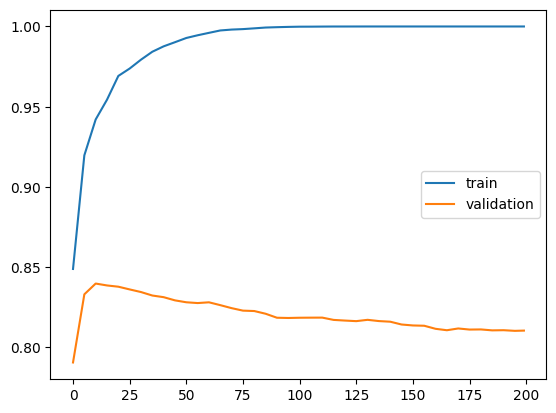

In [98]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='validation')
plt.legend()

### 6.8 XGBoost Parameter tuning
Tuning the following parameters (also note the sequence of the parameters for tuning):
- eta
- max_depth
- min_child_weight

In [128]:
scores = {}

In [137]:
%%capture output

xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, 
                  evals=watchlist, 
                  verbose_eval=5,
                  num_boost_round=200)

In [138]:
key = 'eta=%s' % (xgb_params['eta'])
print(key)
scores[key] = parse_xgb_output(output)

eta=0.01


In [139]:
scores.keys()

dict_keys(['eta=0.3', 'eta=1.0', 'eta=0.1', 'eta=0.05', 'eta=0.01'])

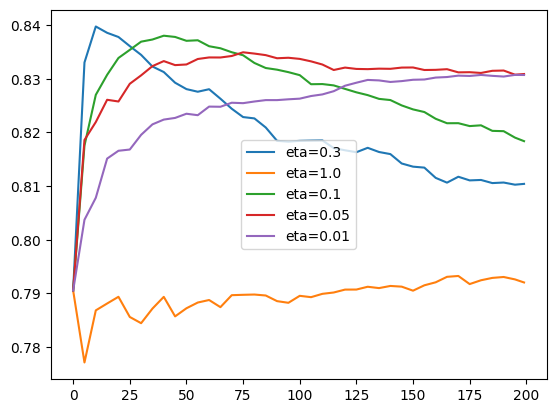

In [142]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)
plt.legend()

Lets simplify this a bit by choosing only 3 values

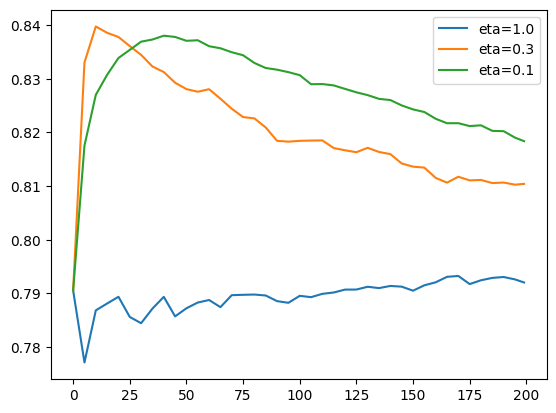

In [146]:
etas = ['eta=1.0', 'eta=0.3', 'eta=0.1']
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()    

Looks like 0.1 is the best performing, although it does not give the highest auc, it still learns steadily and degarades less 

So lets compare the remaining with 0.1

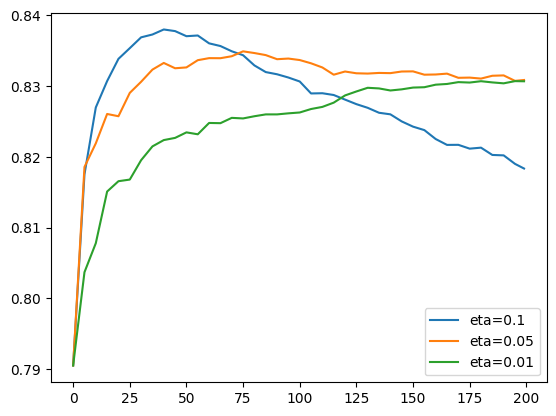

In [148]:
etas = ['eta=0.1', 'eta=0.05', 'eta=0.01']
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()    

eta of 0.1 seems best
```
'eta': 0.1
```

Now lets tune the **max_depth**

In [158]:
scores = {}

In [166]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, 
                  evals=watchlist, 
                  verbose_eval=5,
                  num_boost_round=200)

In [167]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
print(key)
scores[key] = parse_xgb_output(output)

max_depth=10


In [168]:
scores.keys()

dict_keys(['max_depth=6', 'max_depth=3', 'max_depth=4', 'max_depth=10'])

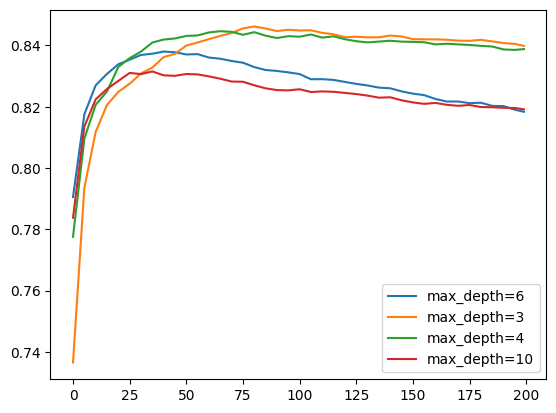

In [169]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
plt.legend()

Lets remove 10 because it has the worst performace 

In [170]:
del scores['max_depth=10']

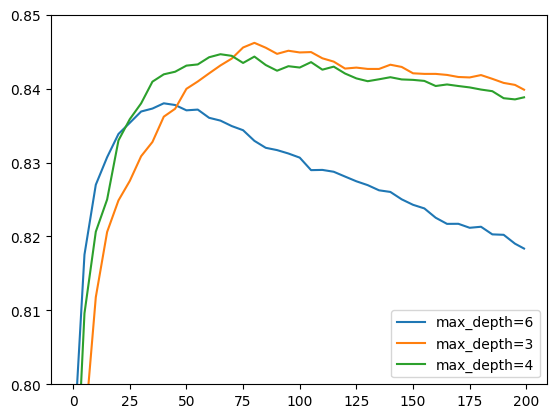

In [172]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.8,0.85)
plt.legend()

**max_depth=3** seems best

Lets now tune the **min_child_weight** parameter

In [173]:
scores = {}

In [181]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 30,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, 
                  evals=watchlist, 
                  verbose_eval=5,
                  num_boost_round=200)

In [182]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
print(key)
scores[key] = parse_xgb_output(output)

min_child_weight=30


In [183]:
scores.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=10', 'min_child_weight=30'])

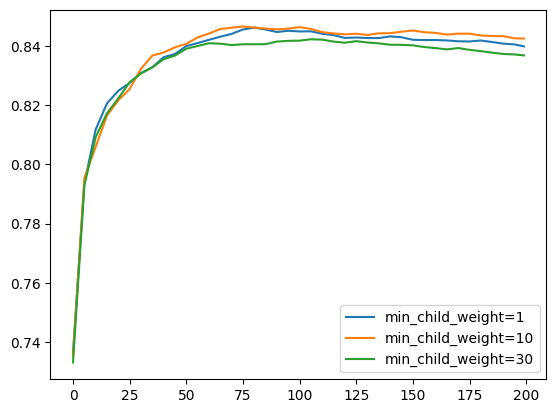

In [187]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
plt.legend()

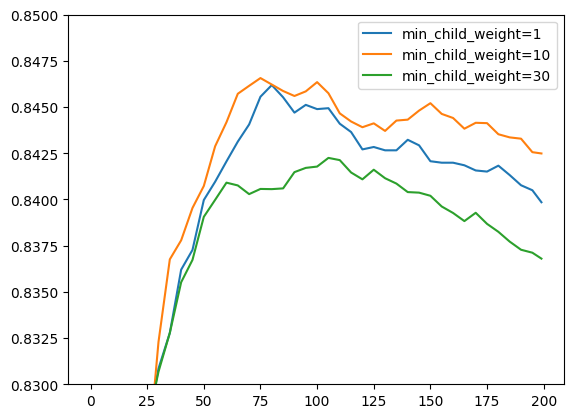

In [188]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
plt.ylim(0.83,0.85)
plt.legend()

Lets choose **min_child_weight=10**

Also we can see how many iterations we need to train it for. Seems like **num_boost_round=75** is good

#### Final XGBoost model

In [193]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 10,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=75)

Other useful parameters:
- **subsample** and **colsample_bytree**
- **lambda** and **alpha**

### Selecting the final model
- Choosing between xgboost, random forest and decision tree
- Training the final model
- Saving the model

#### Final Decision Tree Model

In [191]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [197]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.7829371486488079

#### Final Random Forest Model

In [192]:
rf = RandomForestClassifier(n_estimators=20, max_depth=10, min_samples_leaf=10, random_state=1)
rf.fit(X_train, y_train)

,n_estimators,20
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [198]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.8382183670984038

#### Final XGBoost model

In [196]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 10,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=75)

In [199]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8464956217369272

We see that XGBoost gives the best performance. So we will tune our final model

In [201]:
df_full_train = df_full_train.reset_index(drop=True)

In [203]:
y_full_train = (df_full_train.status == 'default').astype(int).values

In [204]:
del df_full_train['status']

In [205]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [206]:
dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [207]:
features = dv.get_feature_names_out()
features = [str(item) for item in features] 
features

['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

In [208]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features)

In [209]:
dtest = xgb.DMatrix(X_test, feature_names=features)

In [210]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 10,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dfulltrain, num_boost_round=75)

In [213]:
y_pred = model.predict(dtest)
y_pred[:10]

array([0.26089808, 0.269134  , 0.09995261, 0.26971218, 0.28941938,
       0.31422055, 0.02380965, 0.03868742, 0.28288203, 0.2498634 ],
      dtype=float32)

In [214]:
roc_auc_score(y_test, y_pred)

0.8321624065294952

This is very close to the validation score we got earlier. So we can conclude saying that our model didn't overfit and it generalized quite well.